<a href="https://colab.research.google.com/github/3333210108/yunisanovalinasinaga/blob/main/3333210108_YunisaNovalinaS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Data Preprocessing

## Overview

Practice for Data Analytic Class in Merdeka Belajar 

## Objecive

• Retrieving data 

• Cleansing, integrating
dan transforming data

• Data Preparation

• Exploratory Data
Analysis

• Data Visualization


**About Dataset**

This is a snapshot of a dataset created by Tony Pin on Melbourne real estate data. It was scraped from publicly available results posted every week from Domain.com.au. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

This is intended as a static (unchanging) snapshot of https://www.kaggle.com/anthonypino/melbourne-housing-market. It was created in September 2017. Additionally, homes with no Price have been removed.

Dataset description & download https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot

**1.1 Importing Library**

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

**1.2 Importing Dataset**

In [70]:
!gdown 194_-WK-SXwXmfg08fpsEyjk7UfG5I9ZL

Downloading...
From: https://drive.google.com/uc?id=194_-WK-SXwXmfg08fpsEyjk7UfG5I9ZL
To: /content/Bundesliga_Results.csv
100% 412k/412k [00:00<00:00, 94.9MB/s]


In [71]:
import pandas as pd
dataset = pd.read_csv('/content/Bundesliga_Results.csv')
dataset

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,D1,7/8/1993,Bayern Munich,Freiburg,3,1,H,NaN,NaN,NaN,1993-94
1,D1,7/8/1993,Dortmund,Karlsruhe,2,1,H,NaN,NaN,NaN,1993-94
2,D1,7/8/1993,Duisburg,Leverkusen,2,2,D,NaN,NaN,NaN,1993-94
3,D1,7/8/1993,FC Koln,Kaiserslautern,0,2,A,NaN,NaN,NaN,1993-94
4,D1,7/8/1993,Hamburg,Nurnberg,5,2,H,NaN,NaN,NaN,1993-94
...,...,...,...,...,...,...,...,...,...,...,...
7645,D1,12/5/2018,Hoffenheim,Dortmund,3,1,H,1.0,0.0,H,2017-18
7646,D1,12/5/2018,Leverkusen,Hannover,3,2,H,2.0,0.0,H,2017-18
7647,D1,12/5/2018,Mainz,Werder Bremen,1,2,A,1.0,1.0,D,2017-18
7648,D1,12/5/2018,Schalke 04,Ein Frankfurt,1,0,H,1.0,0.0,H,2017-18


## 2. Exploratory Data

In [72]:
dataset.shape

(7650, 11)

In [73]:
dataset.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Season'],
      dtype='object')

In [74]:
dataset.dtypes

Div          object
Date         object
HomeTeam     object
AwayTeam     object
FTHG          int64
FTAG          int64
FTR          object
HTHG        float64
HTAG        float64
HTR          object
Season       object
dtype: object

In [75]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7650 entries, 0 to 7649
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       7650 non-null   object 
 1   Date      7650 non-null   object 
 2   HomeTeam  7650 non-null   object 
 3   AwayTeam  7650 non-null   object 
 4   FTHG      7650 non-null   int64  
 5   FTAG      7650 non-null   int64  
 6   FTR       7650 non-null   object 
 7   HTHG      7038 non-null   float64
 8   HTAG      7038 non-null   float64
 9   HTR       7038 non-null   object 
 10  Season    7650 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 657.5+ KB


In [76]:
dataset.nunique()

Div            1
Date        2182
HomeTeam      43
AwayTeam      43
FTHG          10
FTAG          10
FTR            3
HTHG           6
HTAG           6
HTR            3
Season        25
dtype: int64

**2.1 Handling Missing Value**

Let's assume unknown value as missing value since unknown means not known or no values

In [77]:
dataset.isnull().sum()

Div           0
Date          0
HomeTeam      0
AwayTeam      0
FTHG          0
FTAG          0
FTR           0
HTHG        612
HTAG        612
HTR         612
Season        0
dtype: int64

In [78]:
dataset['HTHG'].dtypes

dtype('float64')

In [79]:
dataset['HTAG'].dtypes

dtype('float64')

In [80]:
dataset['HTR'].dtypes

dtype('O')

Perform imputer to handle missing value in numerical data

In [81]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
imputer

SimpleImputer()

In [82]:
imputer = imputer.fit(dataset[['HTHG']])
imputer

SimpleImputer()

In [83]:
dataset[['HTHG']] = imputer.transform(dataset[['HTHG']])
dataset.isnull().sum()

Div           0
Date          0
HomeTeam      0
AwayTeam      0
FTHG          0
FTAG          0
FTR           0
HTHG          0
HTAG        612
HTR         612
Season        0
dtype: int64

Using drop column tohandle missing value on categorical or object data

In [84]:
dataset = dataset.dropna(axis=1)
dataset.isnull().sum()

Div         0
Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
Season      0
dtype: int64

drop datetime column since we don't need it, we will use it in the next lecure for forecasting time series data

In [85]:
dataset = dataset.drop('HTHG', axis=1)
dataset

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Season
0,D1,7/8/1993,Bayern Munich,Freiburg,3,1,H,1993-94
1,D1,7/8/1993,Dortmund,Karlsruhe,2,1,H,1993-94
2,D1,7/8/1993,Duisburg,Leverkusen,2,2,D,1993-94
3,D1,7/8/1993,FC Koln,Kaiserslautern,0,2,A,1993-94
4,D1,7/8/1993,Hamburg,Nurnberg,5,2,H,1993-94
...,...,...,...,...,...,...,...,...
7645,D1,12/5/2018,Hoffenheim,Dortmund,3,1,H,2017-18
7646,D1,12/5/2018,Leverkusen,Hannover,3,2,H,2017-18
7647,D1,12/5/2018,Mainz,Werder Bremen,1,2,A,2017-18
7648,D1,12/5/2018,Schalke 04,Ein Frankfurt,1,0,H,2017-18


## 3. Data Visualization

**Eploratory Data Analysis (EDA)**

we will not use exploratory data analysis like in the previous class, we'll take another apporach to visualize data

**3.1 Check Outliers**

Outliers are values at the extreme ends of a dataset.

Some outliers represent true values from natural variation in the population. Other outliers may result from incorrect data entry, equipment malfunctions, or other measurement errors.

An outlier isn’t always a form of dirty or incorrect data, so you have to be careful with them in data cleansing. What you should do with an outlier depends on its most likely cause.

for more info: https://www.scribbr.com/statistics/outliers/

In [86]:
dataset.describe()

,FTHG,FTAG
count,7650.000000,7650.000000
mean,1.660000,1.214771
std,1.332276,1.158288
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,9.000000,9.000000


<Axes: >

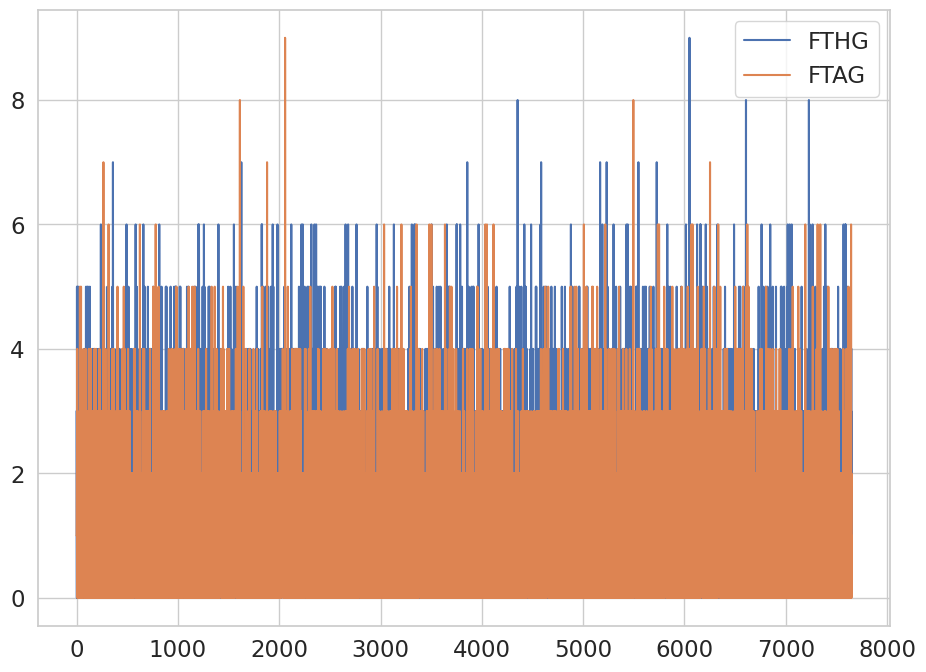

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline
dataset.plot()

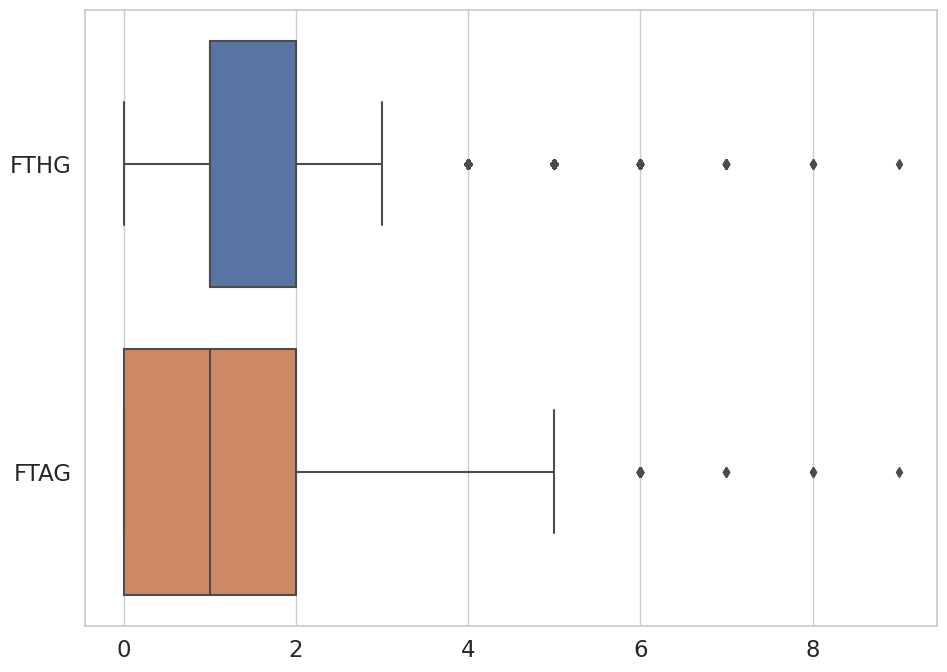

In [88]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

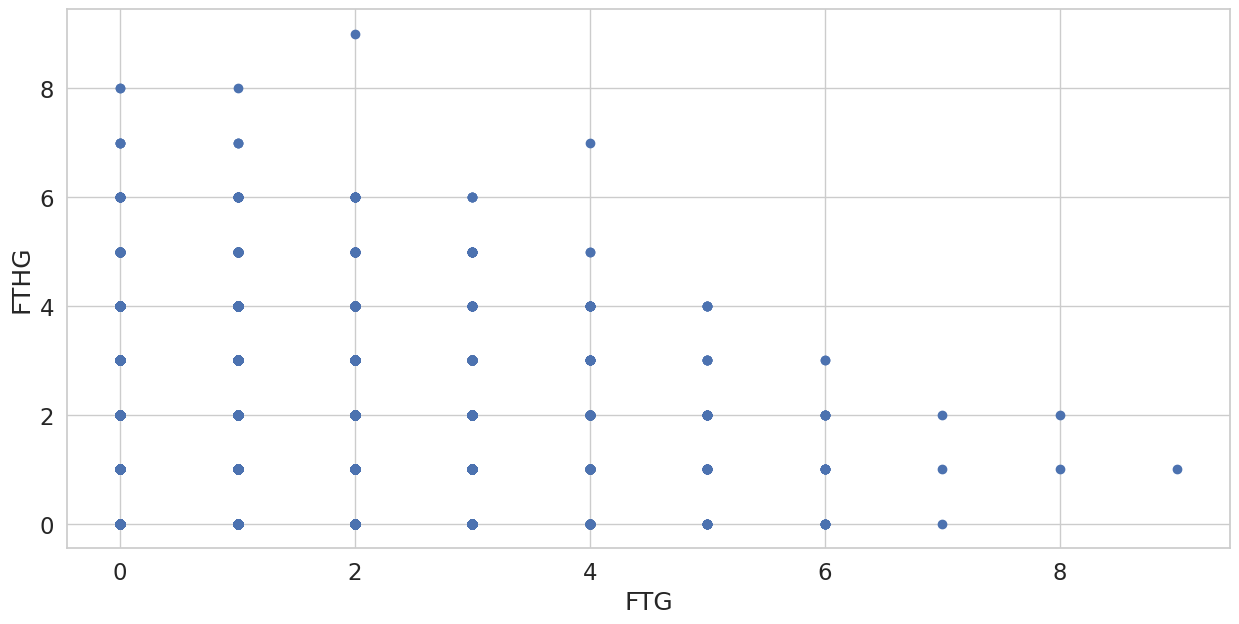

In [89]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['FTAG'], dataset['FTHG'])
 
# x-axis label
ax.set_xlabel('FTG')
 
# y-axis label
ax.set_ylabel('FTHG')
plt.show()

**Removing the outliers using IQR**

**IQR (Inter Quartile Range)**

IQR = Quartile3 – Quartile1

Quartile description: https://rumusbilangan.com/rumus-kuartil/


IQR is interpolation method to remove outliers

To define the outlier base value is defined above and below datasets normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :

upper = Q3 +1.5*IQR

lower = Q1 – 1.5*IQR

how to calculate IQR:

https://www.timesmojo.com/what-is-the-15-iqr-rule/

https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

In the above formula as according to statistics, the 0.5 scale-up of IQR (new_IQR = IQR + 0.5*IQR) is taken, to consider all the data between 2.7 standard deviations in the Gaussian Distribution.

In [90]:
import sklearn

# IQR Price
Q1 = np.percentile(dataset['FTHG'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['FTHG'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (7650, 8)


In [91]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['FTHG'] > upper].index
outliers_lower = dataset[dataset['FTHG'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (6919, 8)


In [92]:
import sklearn

# IQR Landsize
Q1 = np.percentile(dataset['FTHG'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['FTHG'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (6919, 8)


In [93]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['FTHG'] > upper].index
outliers_lower = dataset[dataset['FTHG'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (6919, 8)


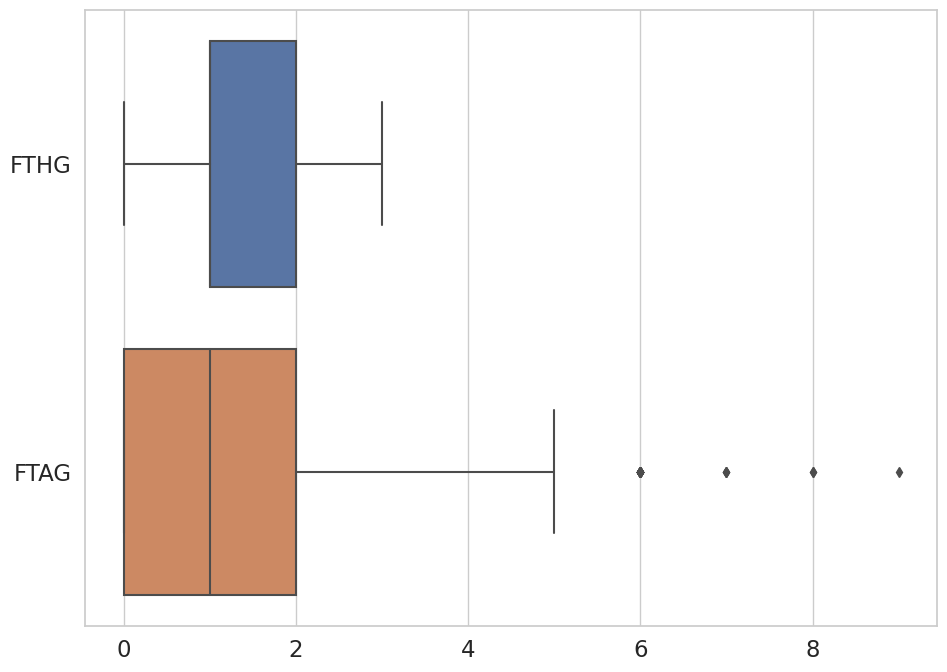

In [94]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

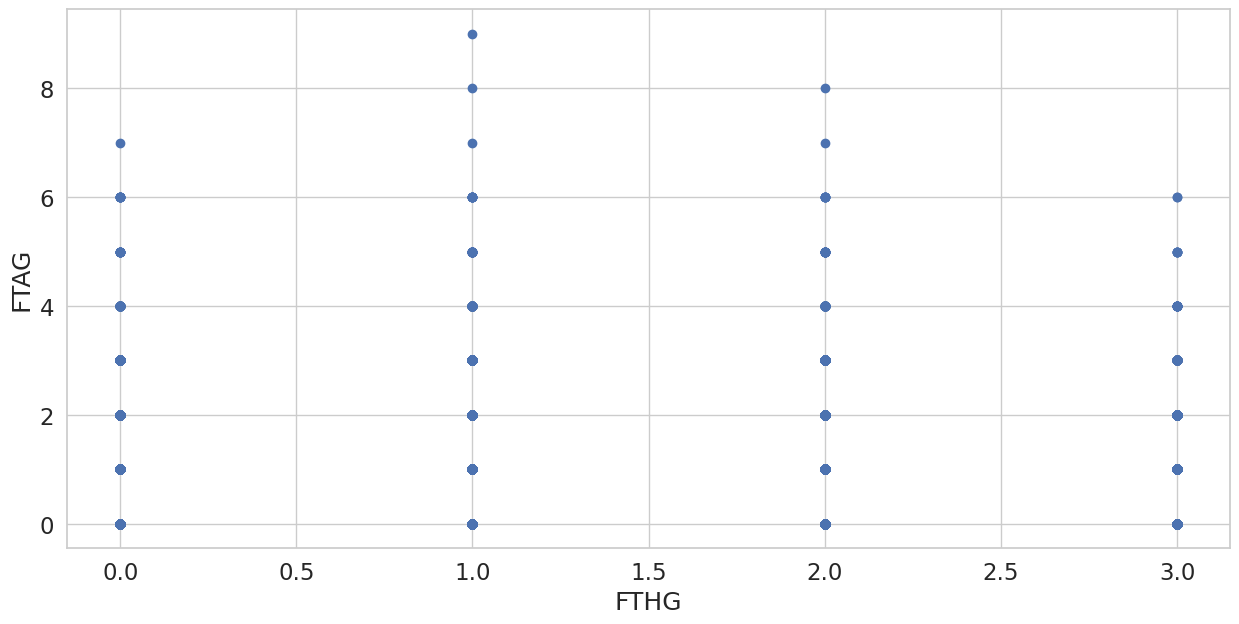

In [95]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['FTHG'], dataset['FTAG'])
 
# x-axis label
ax.set_xlabel('FTHG')
 
# y-axis label
ax.set_ylabel('FTAG')
plt.show()

Show data distribution based on density (kde - kernel density estimation)

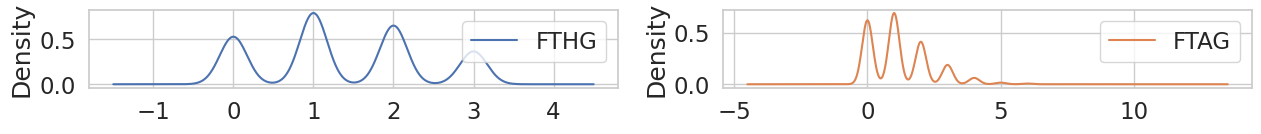

In [96]:
dataset.plot(kind='kde',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

Show data distribution based on histogram

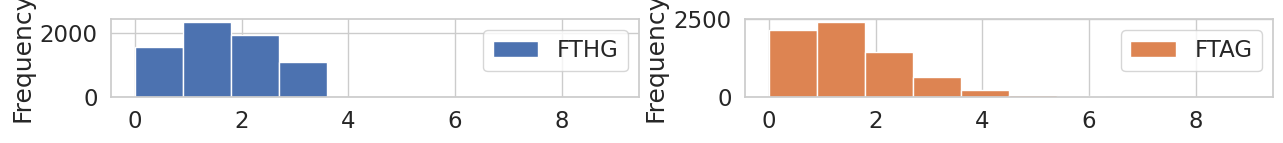

In [97]:
dataset.plot(kind='hist',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

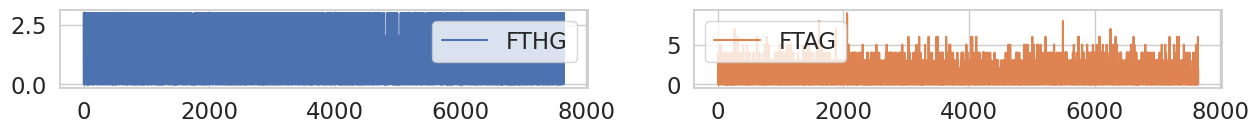

In [98]:
dataset.plot(kind='line',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

**3.2 CORRELATION MATRIX**

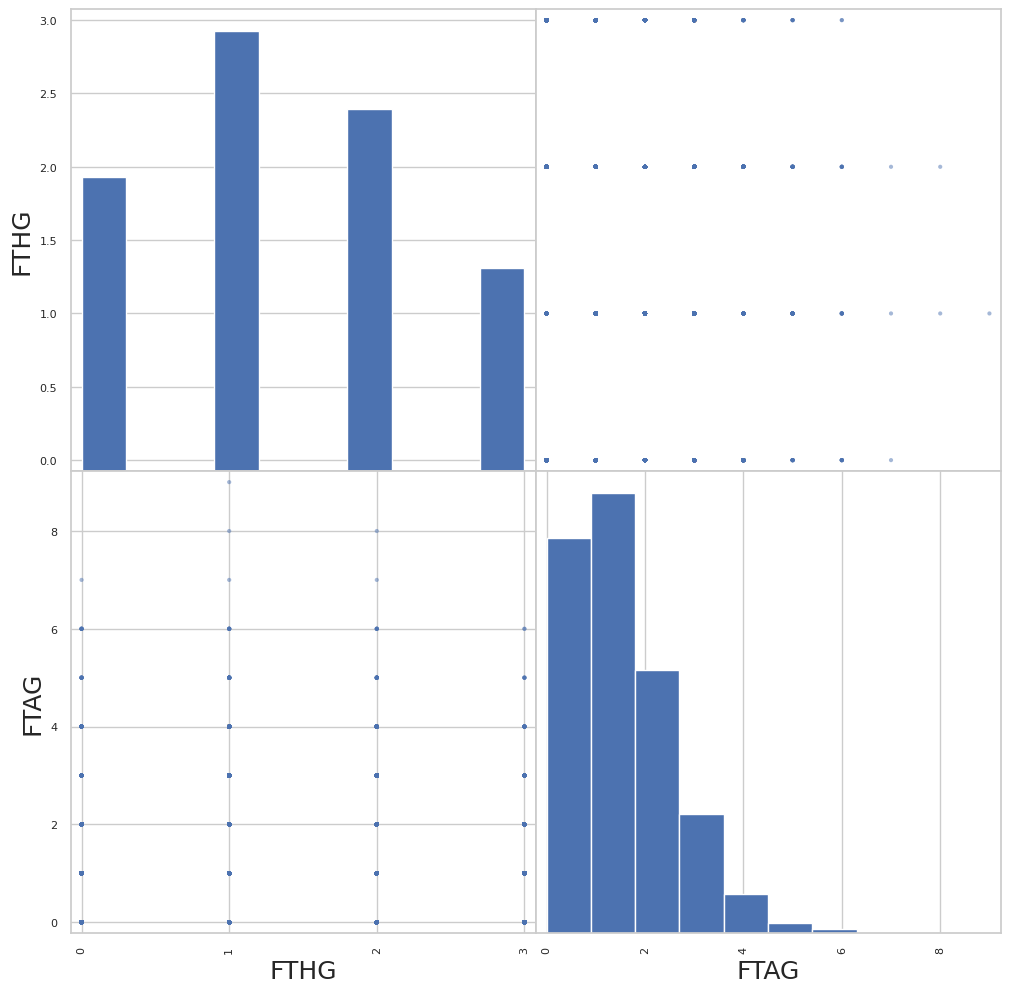

In [99]:
pd.plotting.scatter_matrix(dataset,figsize=(12,12))
plt.show()

correlation matrix with heatmap

<ipython-input-100-4b443a21f68f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = corr_data.corr()


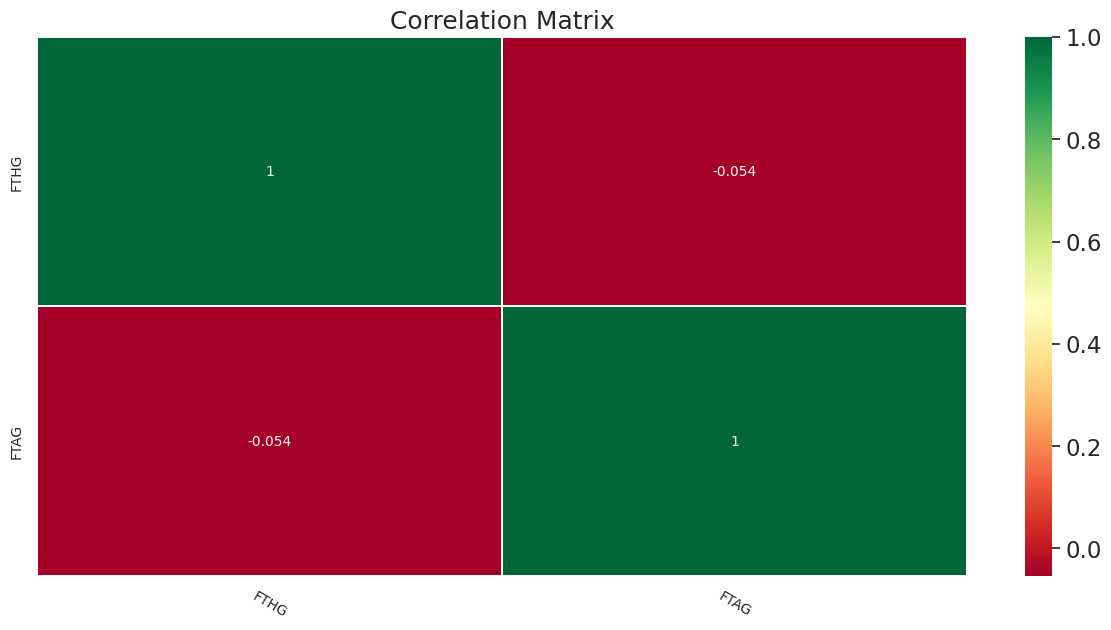

In [100]:
corr_data = dataset
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(15,7)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

**4. Splitting Dataset**

**4.1 Slicing**

We define x and y as x for data and y for label

In [101]:
x = dataset.drop('FTHG', axis=1)
x

,Div,Date,HomeTeam,AwayTeam,FTAG,FTR,Season
0,D1,7/8/1993,Bayern Munich,Freiburg,1,H,1993-94
1,D1,7/8/1993,Dortmund,Karlsruhe,1,H,1993-94
2,D1,7/8/1993,Duisburg,Leverkusen,2,D,1993-94
3,D1,7/8/1993,FC Koln,Kaiserslautern,2,A,1993-94
5,D1,7/8/1993,Leipzig,Dresden,3,D,1993-94
...,...,...,...,...,...,...,...
7644,D1,12/5/2018,Hertha,RB Leipzig,6,A,2017-18
7645,D1,12/5/2018,Hoffenheim,Dortmund,1,H,2017-18
7646,D1,12/5/2018,Leverkusen,Hannover,2,H,2017-18
7647,D1,12/5/2018,Mainz,Werder Bremen,2,A,2017-18


Choose feature Type as a label

In [102]:
y = dataset["FTHG"]
y

0       3
1       2
2       2
3       0
5       3
       ..
7644    2
7645    3
7646    3
7647    1
7648    1
Name: FTHG, Length: 6919, dtype: int64

In [103]:
y.values.reshape(-1,1)

array([[3],
       [2],
       [2],
       ...,
       [3],
       [1],
       [1]])

**4.2 Categorical Encoding**

Choose One Hot Encoding or Label Encoding for perform categorical encoding

**One-Hot Encoding for data input x**

In [104]:
x = pd.get_dummies(x)
x

,FTAG,Div_D1,Date_1/10/1994,Date_1/10/1995,Date_1/10/1999,Date_1/10/2000,Date_1/10/2005,Date_1/10/2006,Date_1/10/2010,Date_1/10/2011,...,Season_2008-09,Season_2009-10,Season_2010-11,Season_2011-12,Season_2012-13,Season_2013-14,Season_2014-15,Season_2015-16,Season_2016-17,Season_2017-18
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7644,6,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7645,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7646,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7647,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [105]:
x.shape

(6919, 2252)

**4.2.1 Standarization**

Standardization is used on the data values that are normally distributed. Further, by applying standardization, we tend to make the mean of the dataset as 0 and the standard deviation equivalent to 1.

That is, by standardizing the values, we get the following statistics of the data distribution

mean = 0
standard deviation = 1

Thus, by this the data set becomes self explanatory and easy to analyze as the mean turns down to 0 and it happens to have an unit variance.

References: https://www.askpython.com/python/examples/standardize-data-in-python#:~:text=Ways%20to%20Standardize%20Data%20in%20Python%201%201.,load_iris%20...%202%202.%20Using%20StandardScaler%20%28%29%20function

In [106]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler().fit_transform(x)
std_scale = pd.DataFrame(std_scale)

std_scale

,0,1,2,3,4,5,6,7,8,9,...,2242,2243,2244,2245,2246,2247,2248,2249,2250,2251
0,-0.196996,0.0,-0.026892,-0.012023,-0.012023,-0.017004,-0.031823,-0.017004,-0.012023,-0.026892,...,-0.201901,-0.205747,-0.2046,-0.201901,-0.207648,-0.203062,-0.2046,-0.205366,-0.204983,-0.206129
1,-0.196996,0.0,-0.026892,-0.012023,-0.012023,-0.017004,-0.031823,-0.017004,-0.012023,-0.026892,...,-0.201901,-0.205747,-0.2046,-0.201901,-0.207648,-0.203062,-0.2046,-0.205366,-0.204983,-0.206129
2,0.658095,0.0,-0.026892,-0.012023,-0.012023,-0.017004,-0.031823,-0.017004,-0.012023,-0.026892,...,-0.201901,-0.205747,-0.2046,-0.201901,-0.207648,-0.203062,-0.2046,-0.205366,-0.204983,-0.206129
3,0.658095,0.0,-0.026892,-0.012023,-0.012023,-0.017004,-0.031823,-0.017004,-0.012023,-0.026892,...,-0.201901,-0.205747,-0.2046,-0.201901,-0.207648,-0.203062,-0.2046,-0.205366,-0.204983,-0.206129
4,1.513186,0.0,-0.026892,-0.012023,-0.012023,-0.017004,-0.031823,-0.017004,-0.012023,-0.026892,...,-0.201901,-0.205747,-0.2046,-0.201901,-0.207648,-0.203062,-0.2046,-0.205366,-0.204983,-0.206129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6914,4.078460,0.0,-0.026892,-0.012023,-0.012023,-0.017004,-0.031823,-0.017004,-0.012023,-0.026892,...,-0.201901,-0.205747,-0.2046,-0.201901,-0.207648,-0.203062,-0.2046,-0.205366,-0.204983,4.851336
6915,-0.196996,0.0,-0.026892,-0.012023,-0.012023,-0.017004,-0.031823,-0.017004,-0.012023,-0.026892,...,-0.201901,-0.205747,-0.2046,-0.201901,-0.207648,-0.203062,-0.2046,-0.205366,-0.204983,4.851336
6916,0.658095,0.0,-0.026892,-0.012023,-0.012023,-0.017004,-0.031823,-0.017004,-0.012023,-0.026892,...,-0.201901,-0.205747,-0.2046,-0.201901,-0.207648,-0.203062,-0.2046,-0.205366,-0.204983,4.851336
6917,0.658095,0.0,-0.026892,-0.012023,-0.012023,-0.017004,-0.031823,-0.017004,-0.012023,-0.026892,...,-0.201901,-0.205747,-0.2046,-0.201901,-0.207648,-0.203062,-0.2046,-0.205366,-0.204983,4.851336


**4.2.2 Normalization**

A way to normalize the input features/variables is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.

The main idea behind normalization/standardization is always the same. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

reference : https://stackoverflow.com/questions/62178888/can-someone-explain-to-me-how-minmaxscaler-works


In [107]:
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(x)
x = pd.DataFrame(x)

x

,0,1,2,3,4,5,6,7,8,9,...,2242,2243,2244,2245,2246,2247,2248,2249,2250,2251
0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6914,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6915,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6916,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6917,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**4.3 Splitting**

In [108]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
x,y = make_blobs(n_samples=1000)
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.33, random_state=1, stratify=y)

In [109]:
from collections import Counter
print("Train distribution", Counter(yTrain))
print("Test distribution", Counter(yTest))

Train distribution Counter({0: 224, 1: 223, 2: 223})
Test distribution Counter({0: 110, 1: 110, 2: 110})


This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

For more: https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn

Tugas praktekkan dengan dataset yg berbeda dari kaggle dan upload di github


In [110]:
from sklearn.linear_model import LogisticRegression

models = []
models.append(('LR', LogisticRegression()))

In [111]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10)    
    # train the model
    cv_results = cross_val_score(model, xTrain, yTrain, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 1.000000 (0.000000)


In [112]:
LR = LogisticRegression()
LR.fit(xTrain, yTrain)

LogisticRegression()

In [113]:
predictions = LR.predict(xTest)
print(accuracy_score(yTest, predictions))

1.0


[[110   0   0]
 [  0 110   0]
 [  0   0 110]]


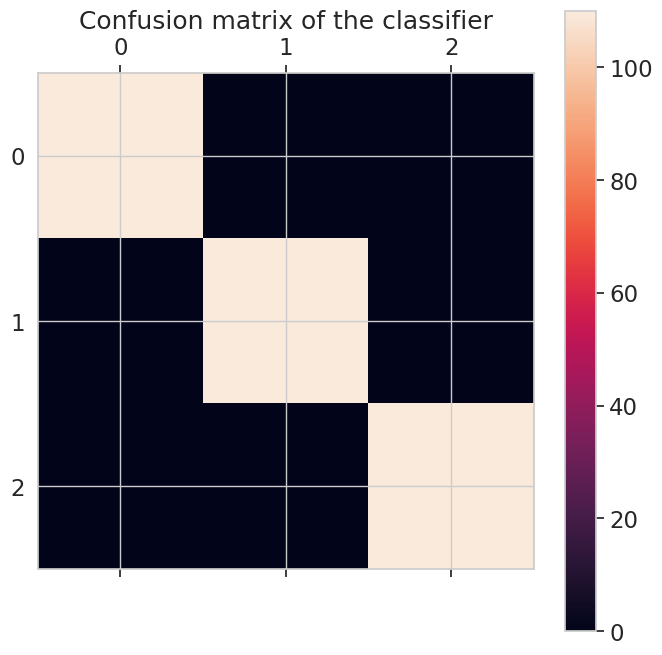

In [114]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(yTest, predictions))

cm = confusion_matrix(yTest, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

In [115]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(yTest, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       110
           2       1.00      1.00      1.00       110

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330



Nama : Yunisa Novalina Sinaga
Deskripsi 

1.Data preprocessing atau pra-pemrosesan data melibatkan persiapan data untuk analisis atau pembelajaran mesin dengan mengubah dan membersihkan data. Ini bisa mencakup penghapusan duplikat, penanganan nilai yang hilang, penskalaan dan normalisasi data, serta encoding variabel kategori.

2.Exploratory data analysis (EDA) atau analisis data eksploratif adalah proses memeriksa dan merangkum karakteristik utama dari suatu dataset. Ini mencakup identifikasi pola dan relasi antar variabel dalam dataset, serta visualisasi data.

3.Penanganan nilai yang hilang (missing value handling) adalah proses untuk menangani data yang hilang atau kosong dalam dataset. Ini bisa dilakukan dengan cara menghapus data kosong tersebut, mengisi nilai kosong dengan rata-rata, median, atau modus dari data yang ada, atau menggunakan teknik imputasi lainnya.

4.Visualisasi data (data visualization) adalah teknik untuk menggambarkan data secara visual, misalnya dengan menggunakan grafik atau diagram, untuk membantu pemahaman dan interpretasi data.

5.Corelation matrix atau matriks korelasi adalah tabel yang menunjukkan korelasi antar pasangan variabel dalam dataset. Ini bisa membantu kita memahami bagaimana variabel-variabel tersebut berhubungan satu sama lain dan memberikan panduan dalam pemilihan fitur.

6.Splitting data atau pembagian data adalah proses memisahkan dataset menjadi dua subset: subset pelatihan (training set) dan subset pengujian (testing set). Subset pelatihan digunakan untuk melatih model atau algoritma, sedangkan subset pengujian digunakan untuk menguji kinerja model atau algoritma.